In [1]:
import numpy as np

### Import Signal 和 Array

`signal.py`定义了一些常用的信号类型，信号对应的 Class 都继承自`Signal`基类, 用于产生多个入射信号  
`array.py`定义了一些常用的阵列结构，所有的阵列对应的 Class 都继承自`Array`基类，`Array`会使用`Signal`产生的信号以及入射角度，根据阵列接受信号的数学模型生成阵列接受信号的仿真数据


In [2]:
from classical_doa.arrays import UniformLinearArray
from classical_doa.signals import ChirpSignal

### 设定仿真参数

设定与阵列结构以及信号参数、入射方向有关的仿真参数，产生采样后的阵列接受信号


In [3]:
# 仿真参数
angle_incidence = np.array([0, 30])
num_snapshots = 300
f0 = np.array([2e6, 3e6])
f1 = np.array([5e6, 6e6])
fs = 2e7
snr = 0

num_antennas = 8
antenna_spacing = 0.5 * (3e8 / max(f1))  # 阵元间距半波长

### 生成仿真信号

创建`Array`和`Signal`的实例，并生成阵列接受信号的仿真数据


In [4]:
# 生成仿真信号
signal = ChirpSignal(nsamples=num_snapshots, fs=fs, f0=f0, f1=f1)

array = UniformLinearArray(m=num_antennas, dd=antenna_spacing)

received_data = array.received_signal(
    signal=signal,
    snr=snr,
    angle_incidence=angle_incidence,
    broadband=True,
    unit="deg",
)

### 估计入射角

`algorithm`中定义了几种经典的 DOA 估计算法，有些算法会输出空间谱，有些算法会直接输出估计的入射角的值  
首先 import 两个和绘图函数，分别用于展示这两种算法的估计结果


In [5]:
from classical_doa.plot import plot_estimated_value, plot_spatial_spectrum

#### IMUSIC 算法


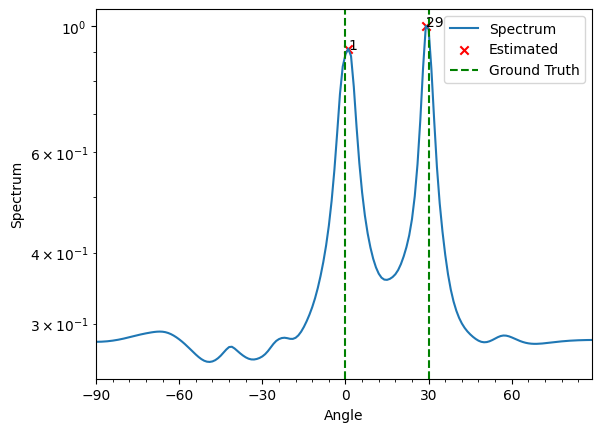

In [6]:
from classical_doa.algorithm import imusic

search_grids = np.arange(-90, 90, 1)

num_signal = len(angle_incidence)
spectrum = imusic(
    received_data=received_data,
    num_signal=num_signal,
    array=array,
    fs=fs,
    angle_grids=search_grids,
    num_groups=5,
    unit="deg",
)

plot_spatial_spectrum(
    spectrum=spectrum,
    ground_truth=angle_incidence,
    angle_grids=search_grids,
    num_signal=num_signal,
)

#### CSSM 算法


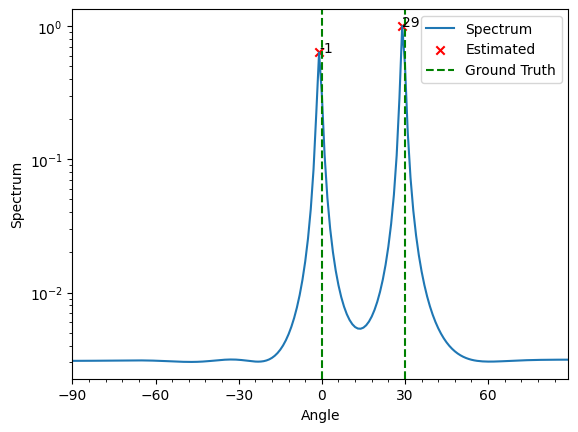

In [7]:
from classical_doa.algorithm import cssm

search_grids = np.arange(-90, 90, 1)

num_signal = len(angle_incidence)
spectrum = cssm(
    received_data=received_data,
    num_signal=num_signal,
    array=array,
    fs=fs,
    angle_grids=search_grids,
    fre_ref=(max(f1) + min(f0)) / 2,
    pre_estimate=np.array([-1, 29]),
    unit="deg",
)

plot_spatial_spectrum(
    spectrum=spectrum,
    ground_truth=angle_incidence,
    angle_grids=search_grids,
    num_signal=num_signal,
)

#### TOPS 算法


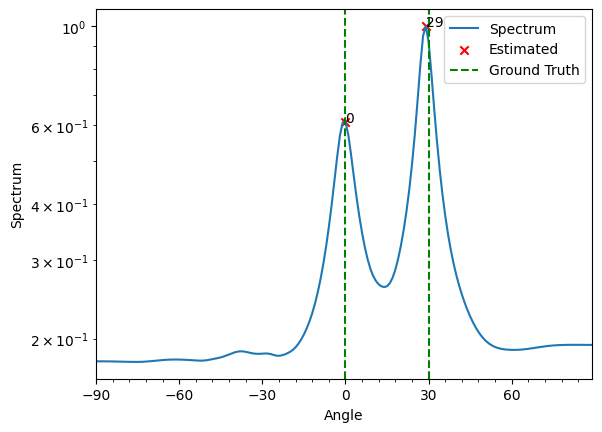

In [8]:
from classical_doa.algorithm import tops

search_grids = np.arange(-90, 90, 1)

num_signal = len(angle_incidence)
spectrum = tops(
    received_data=received_data,
    num_signal=num_signal,
    array=array,
    fs=fs,
    num_groups=5,
    angle_grids=search_grids,
    fre_ref=4e6,
    unit="deg",
)

plot_spatial_spectrum(
    spectrum=spectrum,
    ground_truth=angle_incidence,
    angle_grids=search_grids,
    num_signal=num_signal,
)